In [1]:
#MDS
# https://jessicastringham.net/2018/05/20/Multidimensional-Scaling/


In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns

In [3]:
#Load data and assign a name to features
D = 10
features = ["F"+str(x) for x in range(1,D+1,1)]
dataset: pd.DataFrame = pd.read_csv("data_kPCA.txt", sep = " ", 
                                header = None, 
                                names  = features, 
                                index_col = False)

labels: pd.DataFrame = pd.read_csv("labels_kPCA.txt",  
                                header = None, 
                                names  = ["labels"], 
                                index_col = False)
dataset["labels"] = labels["labels"]

N = 1000
X = dataset.iloc[:1000, :-1].values.T  
y = dataset.iloc[:1000, -1].values

K = 2


In [4]:

centering_matrix = lambda n: np.identity(n) -(np.ones((n, 1)) @ np.ones((1, n)))/n
centered_X = X @ centering_matrix(N)

In [5]:
distance_matrix = euclidean_distances(X.T)**2


In [6]:
def MDS(distance_matrix, K):
    # Double checking that the matrix is the right size
    N = distance_matrix.shape[0]
    assert distance_matrix.shape[0] == distance_matrix.shape[1], 'dist should be a square matrix, but it\'s {}x{}'.format(dist.shape)
    
    # Compute the Gram matrix from the distance_matrix
    gram_from_dist = -(centering_matrix(N) @ distance_matrix @ centering_matrix(N))/2

    # Compute the PC scores from Gram matrix
    w, v = np.linalg.eig(gram_from_dist)
    # Double check the eigenvalues are positive. While they will be for 
    # actual distance matrices, this becomes a problem if we extend this
    # to other types of symmetric matrices that may not be positive semi-definite.
    assert np.all(w[:K] > 0)
    proj = np.diag(np.sqrt(w[:K])) @ v.T[:K]
    
    return proj



In [7]:
pc_score_from_distance_matrix = MDS(distance_matrix, K)

In [8]:
pc_score_from_distance_matrix

array([[-2.34909001+0.j,  8.40101537+0.j,  8.9111033 +0.j, ...,
         8.2890477 +0.j,  8.96444697+0.j,  8.34877306+0.j],
       [27.42858235+0.j, 20.41547307+0.j, -3.93579735+0.j, ...,
         4.16488751+0.j, -2.4336093 +0.j, -1.69976217+0.j]])

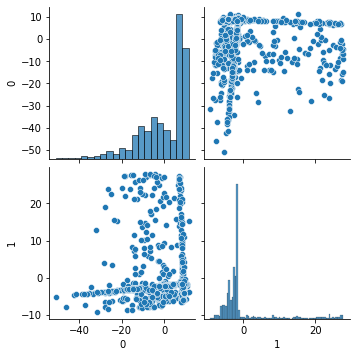

In [9]:

df = pd.DataFrame(pc_score_from_distance_matrix.real.T)
sns.pairplot(df)